## Histograms

Examples of Histograms are given below as templates.

Create data:


In [1]:
import numpy as np

np.random.seed(555)
np.set_printoptions(precision=3)

# Create a random sample of floats drawn from the Laplace distribution.
d = np.random.laplace(loc = 15, scale = 3, size = 500)
d[:5]

array([16.716,  7.961, 21.593, 16.399, 15.532])

Create histogram using Numpy to bin the data

In [3]:
# By default np.histogram creates 10 bins
hist, bin_edges = np.histogram(d)
hist


array([  1,   0,   2,  12,  50, 239, 154,  38,   2,   2])

In [4]:
bin_edges

array([-13.209,  -8.393,  -3.577,   1.239,   6.056,  10.872,  15.688,
        20.504,  25.32 ,  30.137,  34.953])

The code below returns a tuple of the frequency counts and corresponding bin edges. There will be one more bin edge than there are members of the histogram or bins:

In [5]:
hist.size, bin_edges.size

(10, 11)

### Visualization with Matplotlib

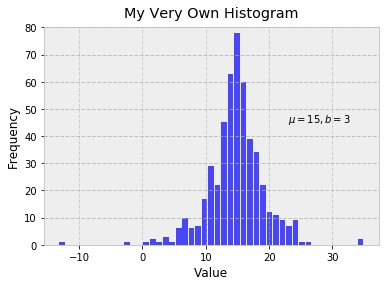

In [8]:
import matplotlib.pyplot as plt

# plt.hist() is an OO interface to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=d, bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

### Plotting Pandas Histograms

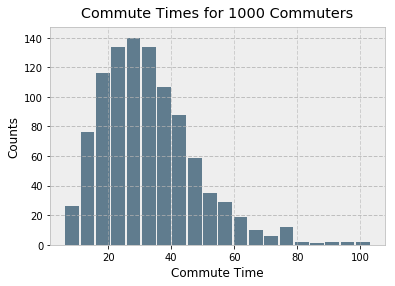

In [10]:
import pandas as pd

# Generate random data on commute times
size, scale = 1000, 10
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

# Pandas' Series.histogram() uses matplotplib.pyplot.hist()
commutes.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.title('Commute Times for 1000 Commuters')
plt.ylabel('Counts')
plt.xlabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

## Try out pandas.DataFrame.histogram()
plt.show()

### Plotting a Kernel Density Estimate (KDE)

A kernel density estimation (KDE) is a way to estimate the probability density function (PDF) of the random variable that underlies the sample. KDE is a means of data smoothing.


In [12]:
# Sample from two different normal distributions
means = 10, 20
stdevs = 4, 2
dist = pd.DataFrame(
        np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),
        columns=['a', 'b'])
# Summarize the distribution
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)


,a,b
min,-2.05,13.59
max,24.01,25.63
mean,10.03,20.05
std,3.98,1.99


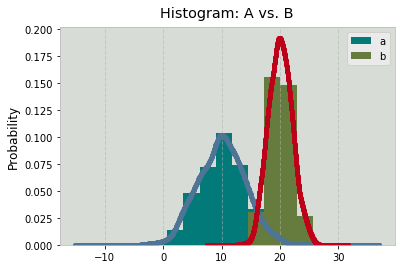

In [14]:
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

### Using Seaborn to plot a distribution with KDE

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


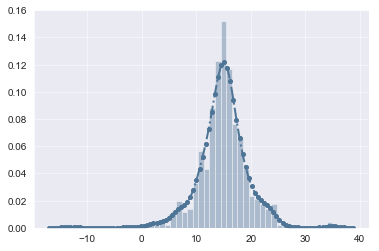

In [17]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(d)
plt.show()

### Other Tools in Panda

The value_counts() method computes a histogram of non-null values to a Pandas Series.


In [18]:
data = np.random.choice(np.arange(10), size=10000,
                       p=np.linspace(1, 11, 10) / 60)

s = pd.Series(data)
s.value_counts()

9    1800
8    1656
7    1472
6    1288
5    1103
4     939
3     696
2     550
1     338
0     158
dtype: int64

In [20]:
s.value_counts(normalize=True)

9    0.1800
8    0.1656
7    0.1472
6    0.1288
5    0.1103
4    0.0939
3    0.0696
2    0.0550
1    0.0338
0    0.0158
dtype: float64

pandas.cut() is a convenient way to bin values into arbitary intervals. Let's say you have some data on ages of individuals and want to bucket them sensibly:


In [21]:
ages = pd.Series(
        [1, 1, 3, 5, 8, 10, 12, 15, 18, 18, 19, 20, 25, 30, 40, 51, 52])
bins = (0, 10, 13, 18, 21, np.inf) # The edges
labels = ('child', 'preteen', 'teen', 'military_age', 'adult')
groups = pd.cut(ages, bins=bins, labels=labels)
groups.value_counts()

child           6
adult           5
teen            3
military_age    2
preteen         1
dtype: int64

In [22]:
pd.concat((ages, groups), axis=1).rename(columns={0: 'age', 1: 'group'})

,age,group
0,1,child
1,1,child
2,3,child
3,5,child
4,8,child
5,10,child
6,12,preteen
7,15,teen
8,18,teen
9,18,teen
